In [2]:
from google.colab import drive
drive.mount('/content/gdrive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

In [4]:
cd/content/gdrive/My Drive/project-dog-classification

/content/gdrive/My Drive/project-dog-classification


In [5]:
!ls

dog_app.ipynb  haarcascades  lfw	       model_transfer.pt  README.md
dogImages      images	     model_scratch.pt  myImages


# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm



# Step 0: Import Datasets
Make sure that you've downloaded the required human and dog datasets:

*  Download the dog dataset. Unzip the folder and place it in this project's home directory, at the location /dogImages.
*   Download the human dataset. Unzip the folder and place it in the home diretcory, at location /lfw.

Note: If you are using a Windows machine, you are encouraged to use 7zip to extract the folder.
In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays human_files and dog_files.

In [7]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


# Step 1: Detect Humans
In this section, we use OpenCV's implementation of Haar feature-based cascade classifiers to detect human faces in images.

OpenCV provides many pre-trained face detectors, stored as XML files on github. We have downloaded one of these detectors and stored it in the haarcascades directory. In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


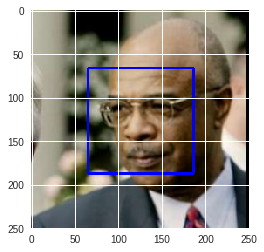

In [8]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale. The detectMultiScale function executes the classifier stored in face_cascade and takes the grayscale image as a parameter.

In the above code, faces is a numpy array of detected faces, where each row corresponds to a detected face. Each detected face is a 1D array with four entries that specifies the bounding box of the detected face. The first two entries in the array (extracted in the above code as x and y) specify the horizontal and vertical positions of the top left corner of the bounding box. The last two entries in the array (extracted here as w and h) specify the width and height of the box.

# Write a Human Face Detector
We can use this procedure to write a function that returns True if a human face is detected in an image and False otherwise. This function, aptly named face_detector, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

# (IMPLEMENTATION) Assess the Human Face Detector
# Question 1: Use the code cell below to test the performance of the face_detector function.

*   What percentage of the first 100 images in human_files have a detected human face?
*   What percentage of the first 100 images in dog_files have a detected human face?

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face. You will see that our algorithm falls short of this goal, but still gives acceptable performance. We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays human_files_short and dog_files_short.

__Answer:__ 
*   What percentage of the first 100 images in human_files have a detected human face?

**100% of the first 100 images in human_files have a detected human face.**


*   What percentage of the first 100 images in dog_files have a detected human face?

**18% of the first 100 images in dog_files have a detected human face** 



In [10]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

def face_detector_performance_test(files):
    detection_counter = 0;
    total_counter = len(files)
    for file in files:
        detection_counter += face_detector(file)
    return detection_counter, total_counter
  
print("detected face in human_files: {} / {}".format(face_detector_performance_test(human_files_short)[0], face_detector_performance_test(human_files_short)[1]))
print("detected face in dog_files: {} / {}".format(face_detector_performance_test(dog_files_short)[0], face_detector_performance_test(dog_files_short)[1])) 

detected face in human_files: 100 / 100
detected face in dog_files: 18 / 100


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :). Please use the code cell below to design and test your own face detection algorithm. If you decide to pursue this optional task, report performance on human_files_short and dog_files_short.

In [0]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

# Step 2: Detect Dogs
In this section, we use a pre-trained model to detect dogs in images.

## Obtain Pre-trained VGG-16 Model
The code cell below downloads the VGG-16 model, along with weights that have been trained on ImageNet, a very large, very popular dataset used for image classification and other vision tasks. ImageNet contains over 10 million URLs, each linking to an image containing an object from one of 1000 categories.

In [12]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# print
print("cuda available? {0}".format(use_cuda))

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:21<00:00, 25980968.19it/s]


cuda available? True


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

In [13]:
# Having a quick look at VGG16.
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

## (IMPLEMENTATION) Making Predictions with a Pre-trained Model
In the next code cell, you will write a function that accepts a path to an image (such as 'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg') as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model. The output should always be an integer between 0 and 999, inclusive.
Before writing the function, make sure that you take the time to learn how to appropriately pre-process tensors for pre-trained models in the PyTorch documentation.

In [0]:
from PIL import Image
import torchvision.transforms as transforms

def load_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    # Pre-process image
    data_transform = transforms.Compose([
                        transforms.RandomResizedCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225])])

    # discard the transparent, alpha channel, add  batch dimension
    image = data_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [0]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    predicted = VGG16(img)
    return torch.max(predicted,1)[1].item() 

## (IMPLEMENTATION) Write a Dog Detector
While looking at the dictionary, you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from 'Chihuahua' to 'Mexican hairless'. Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).
Use these ideas to complete the dog_detector function below, which returns True if a dog is detected in an image (and False if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    
    if (index >= 151 and index <=268):
        return True
    else:
        return False
     # true/false

In [17]:
# Testing code above

print(dog_detector(dog_files_short[0]))
print(dog_detector(human_files_short[0]))

True
False


## (IMPLEMENTATION) Assess the Dog Detector
### Question 2: 
Use the code cell below to test the performance of your dog_detector function.


*   What percentage of the images in human_files_short have a detected dog?
*   What percentage of the images in dog_files_short have a detected dog?


In [18]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

def dog_detector_performance_test(files):
  detection_counter = 0;
  total_counter = len(files)
  for file in files:
    detection_counter += dog_detector(file)
  return detection_counter, total_counter

print("detecting dog in human_files: {} / {}".format(dog_detector_performance_test(human_files_short)[0], dog_detector_performance_test(human_files_short)[1]))
print("detecting dog in dog_files: {} / {}".format(dog_detector_performance_test(dog_files_short)[0], dog_detector_performance_test(dog_files_short)[1]))

detecting dog in human_files: 2 / 100
detecting dog in dog_files: 88 / 100


__Answer:__

*   What percentage of the images in human_files_short have a detected dog?

**2 %  of images in  human _files_short  have a detected dog.**

*   What percentage of the images in dog_files_short have a detected dog?

**88% of images in dog in dog_files_short have a detected dog.**

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as Inception-v3, ResNet-50, etc). Please use the code cell below to test other pre-trained PyTorch models. If you decide to pursue this optional task, report performance on human_files_short and dog_files_short.

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
import torch
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Number of samples loaded for one batch
batch_size = 20

#Number of subprocesses to use when loading the dataset
num_workers = 0

# path directory to the dataset
data_dir = 'dogImages/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

# Appropriate transforms
data_transforms = {'train': transforms.Compose([
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
                   'val': transforms.Compose([
                                     transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
                   'test': transforms.Compose([
                                     transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
                  }

train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['val'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])


train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}





**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?



**Answer**:


**Pre-procesing my datasets through augmentation helped me to increase the amount of relevant data in my datasets. **

*To perform augmentation I used torchvision.transforms.compose and passed the transforms as a list. The transforms are applied following the list order. 
I then passed the transforms to torchvision.datasets.ImageFolder and the images got automatically augmented.*

I decided to preprocessed my datasets slightly differently whether it was the train, valid, or test dataset. 

*   I resized all images as a way to ensure that they are not too big and drain memory. 
*   I chose 256 and 224 because these values are considered to be standard.
*  I normalised all images. 
The normalize transforms parameters are the means and standard deviations of RGB channels of all the training images. 


transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


*  The train_data images go through RandomResizedCrop and RandomHorizontalFlip processes. This augmentation will help prevent the model from overfitting.
*   The valid_data images go through Resize and CenterCrop processes.
*   The test_data images go through a Resize process. 








In [21]:
# Checking the number of images in the datasets

train_size = len(train_data)
print('The number of training images = %d' % train_size)
valid_size = len(valid_data)
print('The number of validation images = %d' % valid_size)
test_size = len(test_data)
print('The number of testing images = %d' % test_size)

The number of training images = 6680
The number of validation images = 835
The number of testing images = 836


In [22]:
# Checking the different breed

breed_names = train_data.classes
print(breed_names)

['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Cane_corso', '045.Cardigan_welsh_

In [23]:
# Checking the number of breeds

number_breed = len(breed_names)
print('Number of breeds: {}'.format(number_breed))


Number of breeds: 133


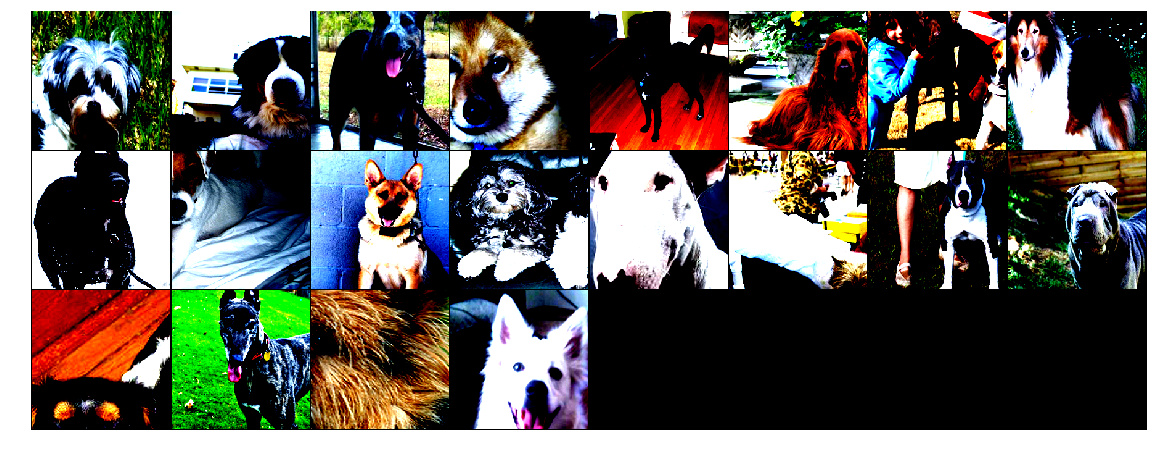

In [24]:
# Checking the transformations with a visualisation

from torchvision import utils

def show_sample(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    
    fig = plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.imshow(inp)
    plt.pause(0.001)
    
# Get a batch of training data.    
inputs, classes = next(iter(loaders_scratch['train']))

# Convert the batch to a grid.
grid = utils.make_grid(inputs)

# Display!
show_sample(grid)

## (IMPLEMENTATION) Model Architecture
Create a CNN to classify dog breed. Use the template in the code cell below.

In [26]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        # max pooling layer
        self.max_pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU(inplace=True)
        # batchnorm
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(7 * 7 * 128, 500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, 133)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = self.bn1(x)
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = self.bn2(x)
        x = F.relu(self.conv3(x))
        x = self.max_pool(x)
        x = self.bn3(x)
        # flatten image input
        x = x.view(-1, 7 * 7 * 128)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU(inplace)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=6272, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

**My starting point**

When defining architecture of the CNN to classify dog breed, I initially chose to take inspiration from the Convolutional Neural Networks notebook lesson that was dedicated to classify images from the CIFAR-10 database. This architecture that I started with, and then modified, originally had: 
*   3 convolutional layers, which can be thought of as a stack of filtered images. Convolutional layers have a specific number of channels which detect a specific feature in the image.
*   1 Maxpooling layer after each convolutional layer.
*   Standard  ReLU activation function. It thresholds all incoming features to be 0 or greater.
*   2 linear layers and a dropout layer to avoid over fitting.

I chose to take this as a starting point since it is good practice to look at existing research and related models prior to defining your own model. 

**How I adapted it**

I then adapted this initial skeleton to my purpose. 
I decided to keep:
*   3 convolutional layers
*   1 Maxpooling layer after each convolutional layer
*   Standard ReLU activation function
*   2 linear layers and a dropout layer to avoid over fitting.

More precisely:



*   The more convolutional layers you include, the more complex patterns in colors and shapes a model can detect. I could have picked more convolutional layers, but I was worried by that making a much bigger model, I would end up with a memory or time problem during training. So I kept 3 layers. 


*   The first convolutional layer has 3 color channels, produce 32 color channels from these 3. It has a kernel size of 3x3. It has a stride of 2. It has padding of 1 on edges. 
*   The second convolutional layer has  32 color channels, produces 64 color channels. It has a kernel size of 3x3. It has a stride of 2. It has a padding of 1 on edges. 
*   The third convolutional layer has 64 color channels and produces 128 color channels. It has a kernel size of 3x3. It has a stride of 1. It has a padding of 1 on edges.

Following these convolutional layers, I applied:

*   Maxpooling layers of 2x2

* I chose a dropout of 25%.

**Initial result**

When I first tried the 'skeleton' - with of course modifying  so that it matches the mumber of dog breeds, or class like so :
self.fc2 = nn.Linear(500, 133) 
I only reached 4% acuracy. 

**Second attempt**

I requested advice from the mentor, who suggested adding Batchnorm.
I tried adding Batch-norm after my first layer and left the rest of the model as it was. 

**Second attempt result**

I only reached 9% accuracy. 

**Third attempt**

I decided to do a bit of research about batch-norm before modifying the architecture again. 
 

*   Batch-norm is not included in the pre-trained VGG16 so it is considered interesting to include it in my very simple CNN. Batch-norm is powerful because it reduced the covariant shift. That is to say, it helps the learning algorithm to adapt to a different dataset of images.
*   Furthermore batch-norm helps each layer of a network to learn by itself a little bit mode independently. 
*   Batch-norm allows to use higher learning rates
*   Batch-norm reduces over-fitting, like dropout it adds noise to each hidden layer's activation. 

I then chose to try adding 3 batch-norm layers, that is to say one after each Maxpooling layer.

So my third attempt architecture was (pasting what is printed above):

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU(inplace)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=6272, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


I chose to use CrossEntropyLoss for loss function, and optimSGC for optimizer, and a learning rate of 0.05. 

**Third attempt result**

When the model started training it was much faster than my two attempts, the epochs were less long. 
After training for 20 epochs, the test accuracy reached 19%. 

Since I am a beginner to neural network architecture, and since 19% was more than requested ("ensure that accuracy is greater than 10%"" ), I decided to keep that version of the architecture. 













### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [0]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # update training loss
            train_loss += loss.item() * data.size(0)            
           
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item() * data.size(0)
            
        # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)    

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))
        
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
          print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
          valid_loss_min,
          valid_loss))
          torch.save(model.state_dict(), 'model_scratch.pt')
          valid_loss_min = valid_loss
            
    # return trained model
    return model


In [29]:
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


Epoch: 1 	Training Loss: 4.708431 	Validation Loss: 4.494757
Validation loss decreased (inf --> 4.494757).  Saving model ...
Epoch: 2 	Training Loss: 4.476286 	Validation Loss: 4.174107
Validation loss decreased (4.494757 --> 4.174107).  Saving model ...
Epoch: 3 	Training Loss: 4.276942 	Validation Loss: 3.989077
Validation loss decreased (4.174107 --> 3.989077).  Saving model ...
Epoch: 4 	Training Loss: 4.139653 	Validation Loss: 3.975527
Validation loss decreased (3.989077 --> 3.975527).  Saving model ...
Epoch: 5 	Training Loss: 4.007301 	Validation Loss: 3.798827
Validation loss decreased (3.975527 --> 3.798827).  Saving model ...
Epoch: 6 	Training Loss: 3.902832 	Validation Loss: 3.726899
Validation loss decreased (3.798827 --> 3.726899).  Saving model ...
Epoch: 7 	Training Loss: 3.829396 	Validation Loss: 3.560785
Validation loss decreased (3.726899 --> 3.560785).  Saving model ...
Epoch: 8 	Training Loss: 3.760952 	Validation Loss: 3.564021
Epoch: 9 	Training Loss: 3.673520 

In [0]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

##(IMPLEMENTATION) Test the Model
Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy. Ensure that your test accuracy is greater than 10%.

In [34]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.470532


Test Accuracy: 19% (159/836)


#Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)
You will now use transfer learning to create a CNN that can identify dog breed from images. Your CNN must attain at least 60% accuracy on the test set.
###(IMPLEMENTATION) Specify Data Loaders for the Dog Dataset
Use the code cell below to write three separate data loaders for the training, validation, and test datasets of dog images (located at dogImages/train, dogImages/valid, and dogImages/test, respectively).
If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [0]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [37]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
for param in model_transfer.features.parameters():
    param.require_grad = False

In [0]:
model_transfer.classifier[6] = nn.Linear(4096, 133)

In [0]:
if use_cuda:
    model_transfer = model_transfer.cuda()

In [42]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

**VGG16**

I chose VGG16 as a transfer model because it has been trained on more than a million images from the ImageNet database. It is currently the most preferred choice in the deep learning community for extracting features from images.

It is 16 convolutional layers deep and has a very uniform architectecture. It has been trained to classify images into 1000 categories. The VGG16 is known for its representation depth which is improving classification accuracy. I therefore think that this network will be able to detect the features that allow to identify dog breeds.

The VGG16 architecture, as printed above:

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace)
    (2): Dropout(p=0.5)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace)
    (5): Dropout(p=0.5)
    (6): Linear(in_features=4096, out_features=133, bias=True)
  )
)

As you can see, the VGG16 is built with convolutional layers (3 * 3 size) , MaxPooling layers (2 * 2 size), it ends with 3 fully connected layers. 


I believe that a pre-trained VGG16 can allow me to classify those dog breeds and that very few modifications are needed to allow to do so. 

I changed the ouput of the last linear layer from 1000 to 133, in order to match the number of classses of the dataset. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [44]:
# train the model
n_epochs = 10
model_transfer.cuda()
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


Epoch: 1 	Training Loss: 4.183266 	Validation Loss: 2.722745
Validation loss decreased (inf --> 2.722745).  Saving model ...
Epoch: 2 	Training Loss: 2.477573 	Validation Loss: 1.166689
Validation loss decreased (2.722745 --> 1.166689).  Saving model ...
Epoch: 3 	Training Loss: 1.657404 	Validation Loss: 0.727093
Validation loss decreased (1.166689 --> 0.727093).  Saving model ...
Epoch: 4 	Training Loss: 1.386533 	Validation Loss: 0.579854
Validation loss decreased (0.727093 --> 0.579854).  Saving model ...
Epoch: 5 	Training Loss: 1.209323 	Validation Loss: 0.505626
Validation loss decreased (0.579854 --> 0.505626).  Saving model ...
Epoch: 6 	Training Loss: 1.120985 	Validation Loss: 0.458459
Validation loss decreased (0.505626 --> 0.458459).  Saving model ...
Epoch: 7 	Training Loss: 1.062327 	Validation Loss: 0.436774
Validation loss decreased (0.458459 --> 0.436774).  Saving model ...
Epoch: 8 	Training Loss: 1.014120 	Validation Loss: 0.417318
Validation loss decreased (0.43677

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [45]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.691832


Test Accuracy: 80% (669/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
model_transfer.cpu()
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    transform = transforms.Compose([transforms.Resize(224),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                 std=[0.229, 0.224, 0.225])])
    
    image = Image.open(img_path)
    image = transform(image).unsqueeze(0)
    input_data = Variable(image, requires_grad=False)
    out = model_transfer(input_data)
    max, argmax = out.data.squeeze().max(0)
    class_id = argmax.item()
    return class_names[class_id]

In [47]:
# Checking prediction
predict_breed_transfer(dog_files[100])

'Basenji'

In [48]:
# Checking amount of classes
len(class_names)

133

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
import glob

# Loading test images
my_files = glob.glob('./myImages/*')


In [0]:
### TODO: Write your algorithm.

def run_app(img_path):
  img = Image.open(img_path)
  plt.imshow(img)
  plt.show()
       
    ## handle cases for a human face, dog, and neither
  face = face_detector(img_path)  
  dog  = dog_detector(img_path)
  if face and not dog:
    
    print("This is a human!")
    print("It looks like a ")
    print(predict_breed_transfer(img_path))
        
  elif dog and not face:
    print("Hello doggie, I think you're a ")
    print(predict_breed_transfer(img_path))
        
  else:
    print("Error. I can't tell whether it is a dog or a human")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

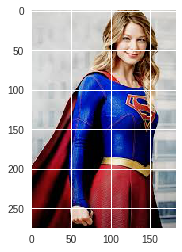

This is a human!
It looks like a 
Doberman pinscher


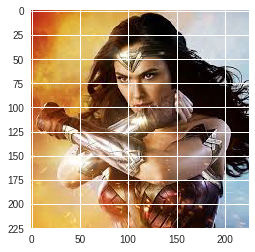

This is a human!
It looks like a 
Chinese crested


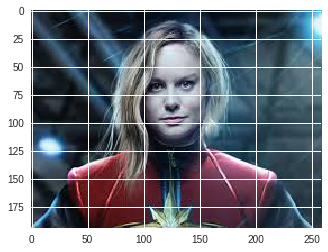

This is a human!
It looks like a 
Afghan hound


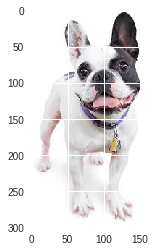

Hello doggie, I think you're a 
Boston terrier


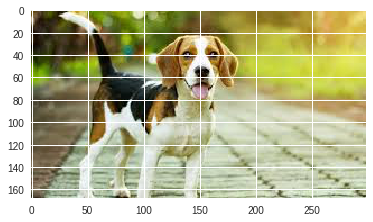

Hello doggie, I think you're a 
American foxhound


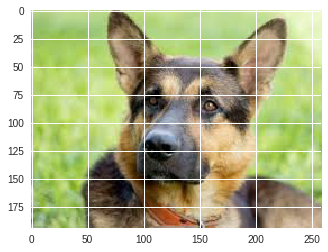

Hello doggie, I think you're a 
German shepherd dog


In [53]:
# Test!
for file in np.hstack((my_files)):
    run_app(file)

__Answer:__ 

**All the human images** (Wonder Woman, Super Girl, Captain Marvel) **were detected as human.**  

**All the dogs** **were detected as dogs. **

Being a dog person, I am quite impressed by the output and recognition of the dogs. There isn't much difference between a Boston Terrier and a French Bulldog and it is not a big mistake made by the algorithm. Same for the other dog: it's a harrier, but it is very similar to the breed predicted by the algorithm - except that the American Foxhound has longer legs, so again it is not a big mistake. 

However, I think the dog detection could be slightly improved:

*   I could try using a different model transfer utilising Resnet, and compare the performances with my current VGG16 transfer model. 
*   I could improve the datasets by doing more aggressice dataset  augmentation.
*   I could tune the hyperparameters. I could try using a different optimizer. I could try a different learning rate. 






 


